In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16071,-122.49,37.75,43.0,2044.0,393.0,979.0,378.0,3.9205,NEAR OCEAN,319100.0
6800,-118.12,34.09,25.0,4870.0,1371.0,3518.0,1296.0,3.2307,<1H OCEAN,188400.0
15487,-117.12,33.14,16.0,1710.0,272.0,1025.0,267.0,4.1641,<1H OCEAN,163600.0
19127,-122.67,38.25,32.0,1333.0,235.0,660.0,206.0,4.0729,<1H OCEAN,288500.0
898,-121.96,37.53,18.0,2375.0,652.0,1252.0,586.0,2.6198,<1H OCEAN,235900.0
...,...,...,...,...,...,...,...,...,...,...
18674,-121.90,36.97,21.0,3707.0,751.0,1420.0,608.0,4.4485,NEAR OCEAN,295200.0
13816,-117.20,34.46,7.0,8414.0,1584.0,5146.0,1517.0,3.2794,INLAND,92500.0
15281,-117.30,33.06,31.0,2128.0,520.0,1049.0,485.0,4.0270,NEAR OCEAN,290000.0
6992,-118.02,33.95,38.0,2139.0,426.0,1138.0,412.0,4.2917,<1H OCEAN,168900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

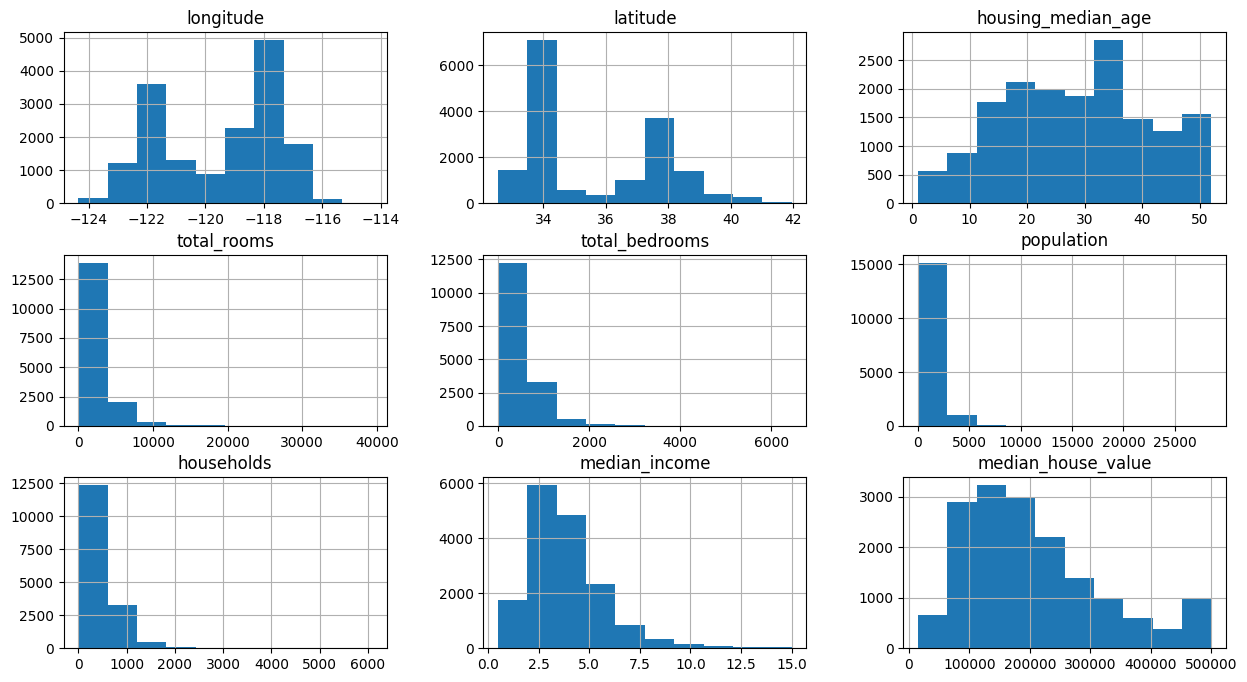

In [10]:
train_data.hist(figsize=(15, 8))

<Axes: >

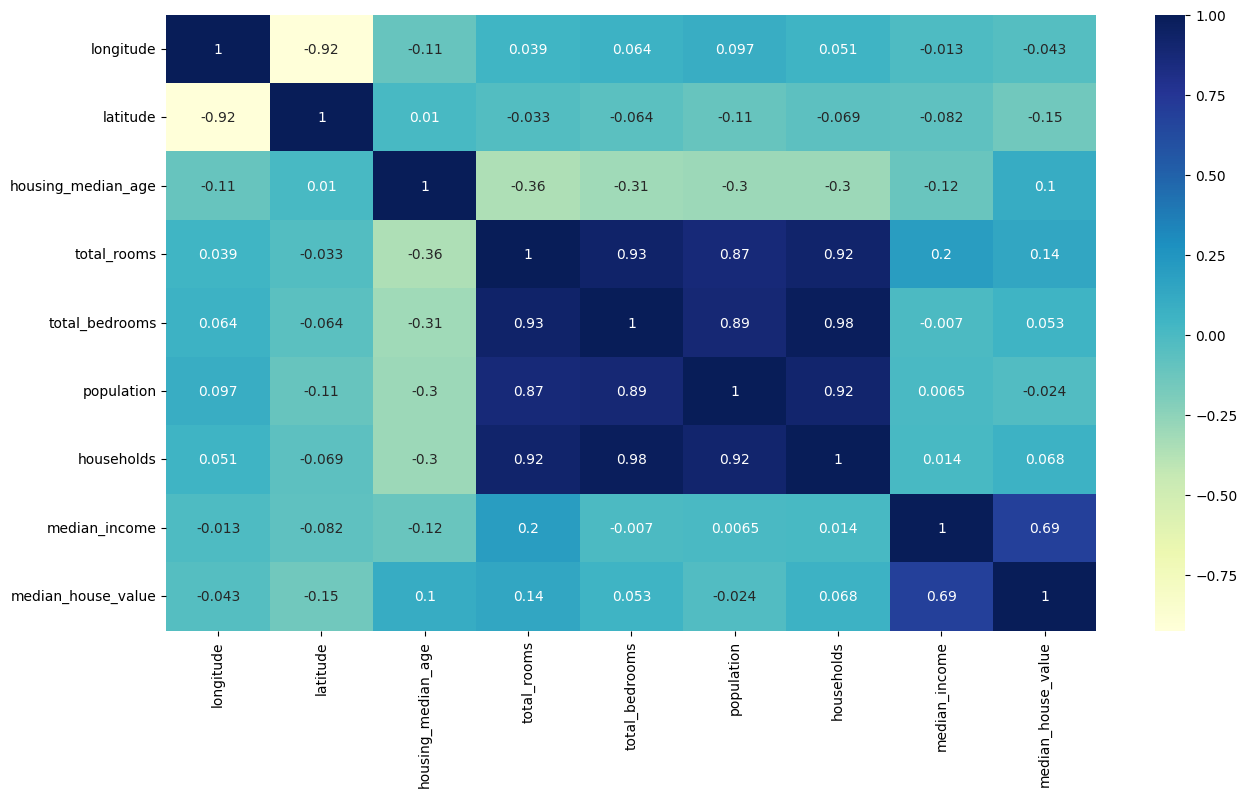

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

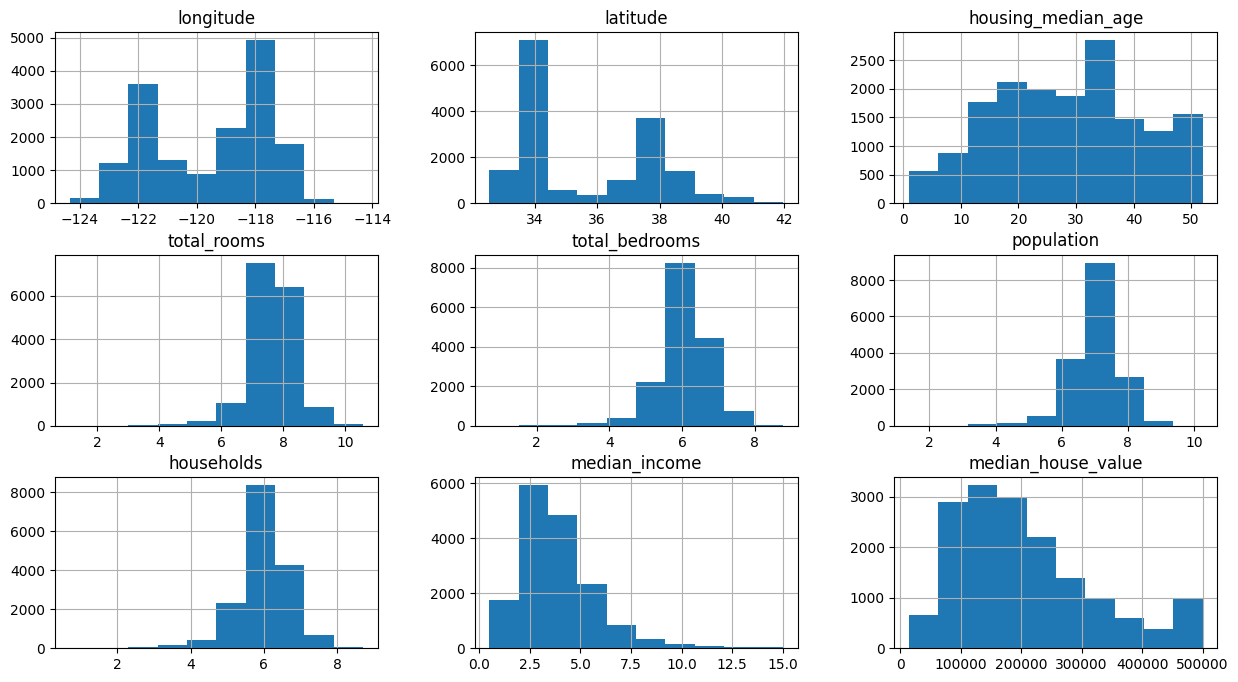

In [13]:
train_data.hist(figsize=(15, 8))

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7207
INLAND        5218
NEAR OCEAN    2119
NEAR BAY      1800
ISLAND           2
Name: count, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16071,-122.49,37.75,43.0,7.623153,5.976351,6.887553,5.937536,3.9205,319100.0,False,False,False,False,True
6800,-118.12,34.09,25.0,8.491055,7.224025,8.165932,7.167809,3.2307,188400.0,True,False,False,False,False
15487,-117.12,33.14,16.0,7.444833,5.609472,6.933423,5.590987,4.1641,163600.0,True,False,False,False,False
19127,-122.67,38.25,32.0,7.195937,5.463832,6.493754,5.332719,4.0729,288500.0,True,False,False,False,False
898,-121.96,37.53,18.0,7.773174,6.481577,7.133296,6.375025,2.6198,235900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18674,-121.90,36.97,21.0,8.218248,6.622736,7.259116,6.411818,4.4485,295200.0,False,False,False,False,True
13816,-117.20,34.46,7.0,9.037771,7.368340,8.546169,7.325149,3.2794,92500.0,False,True,False,False,False
15281,-117.30,33.06,31.0,7.663408,6.255750,6.956545,6.186209,4.0270,290000.0,False,False,False,False,True
6992,-118.02,33.95,38.0,7.668561,6.056784,7.037906,6.023448,4.2917,168900.0,True,False,False,False,False


<Axes: >

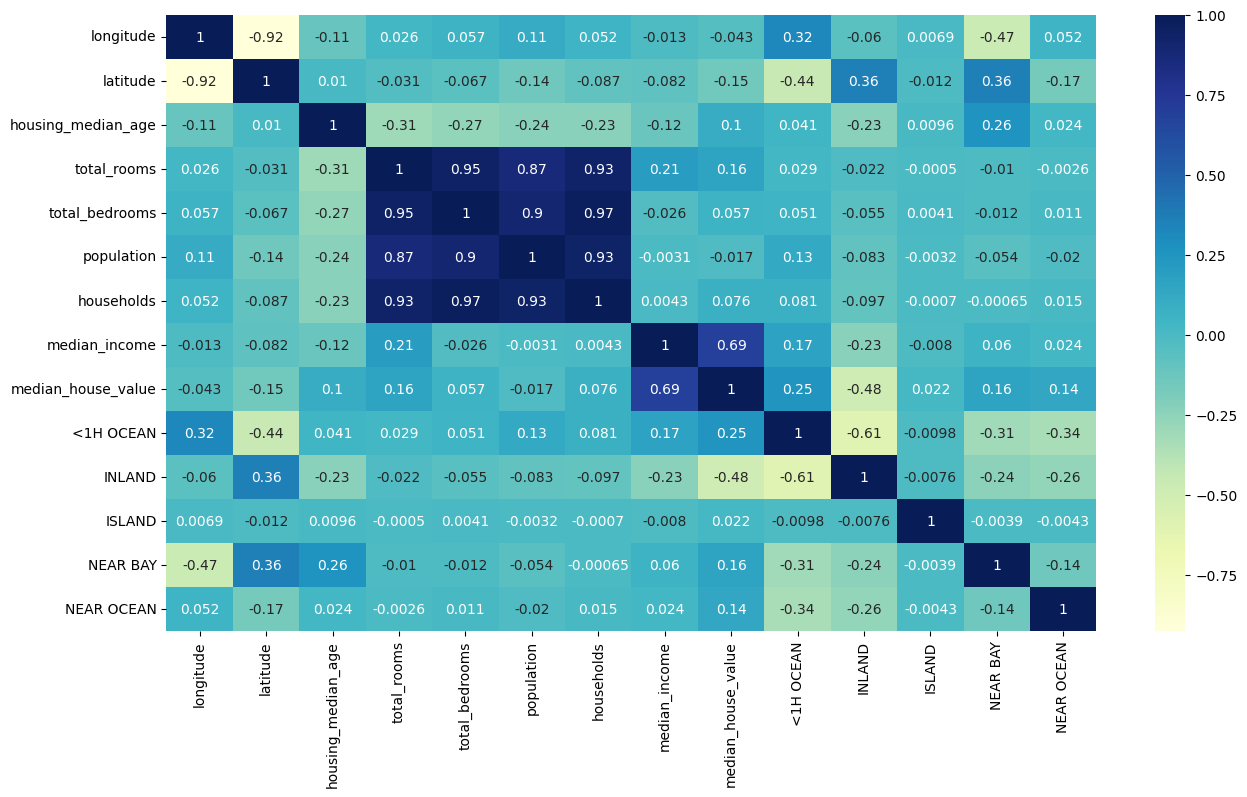

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

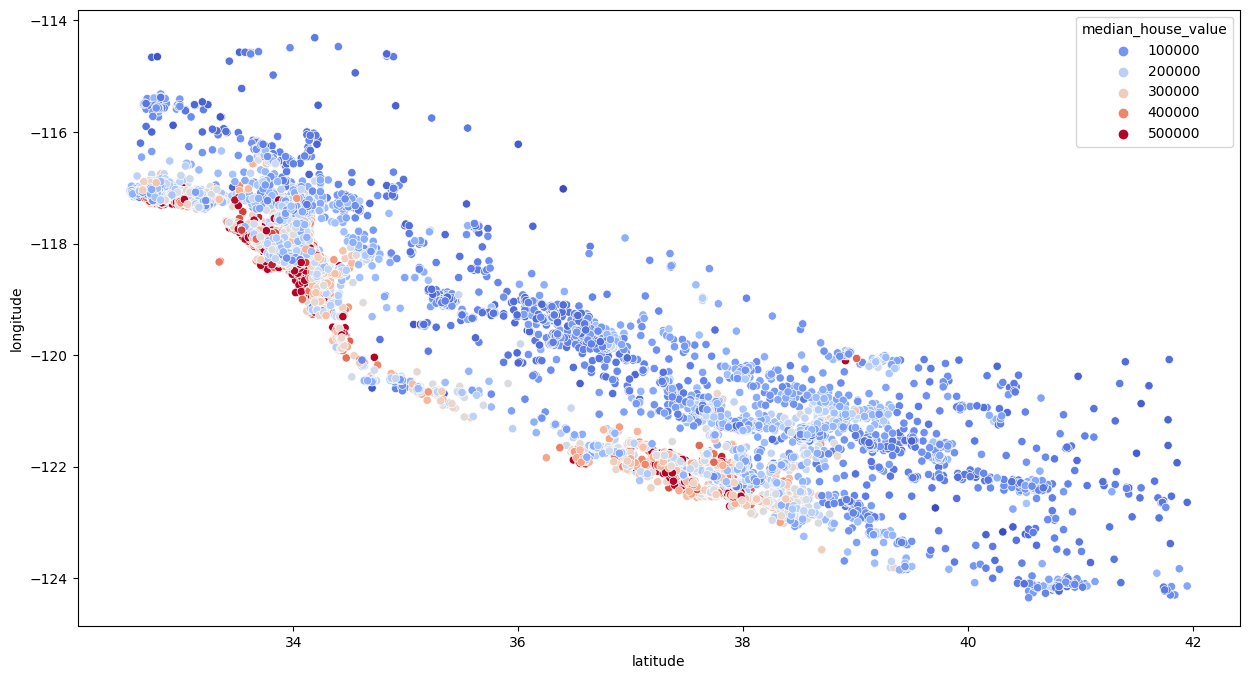

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

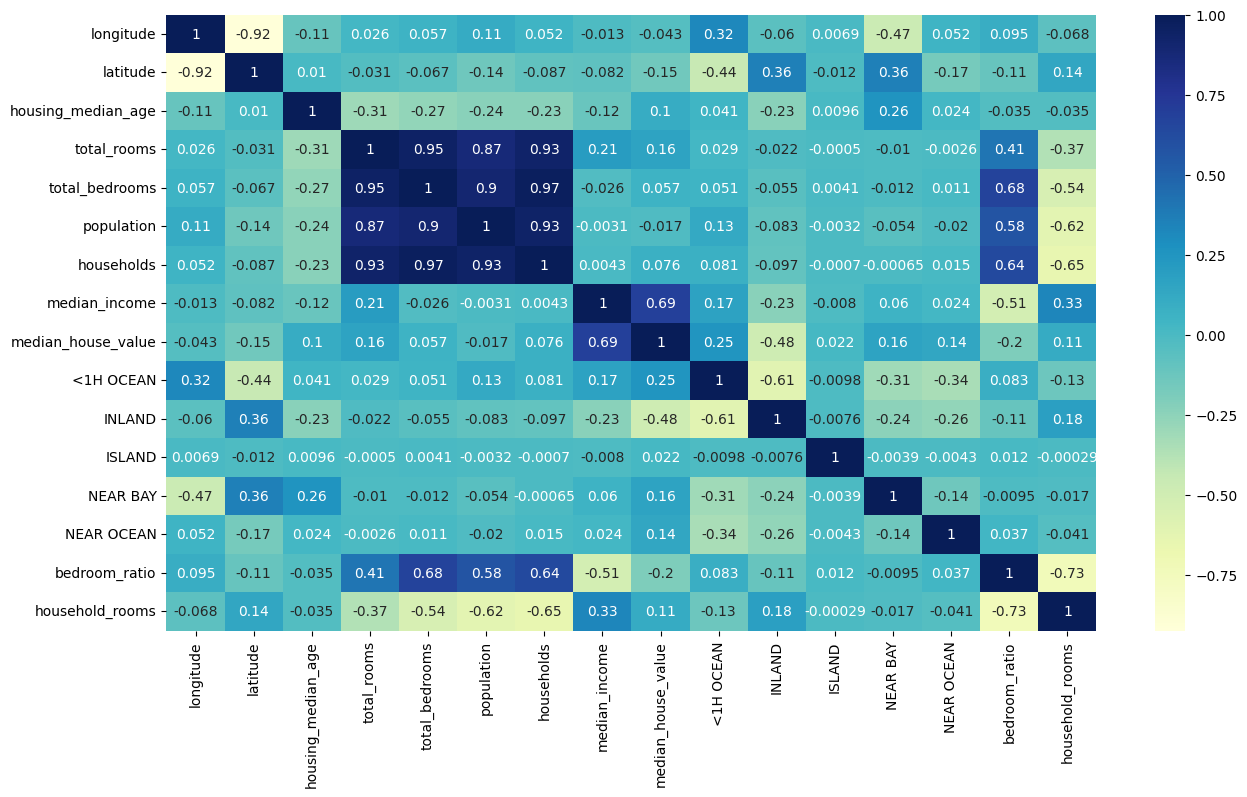

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [22]:
# 함수 만들어 놓으면 편함
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
# train과 똑같은 컬럼 순서·이름을 가지되, 없는 컬럼은 0으로 채움
# ISLAND가 훈련데이터에만 있고 테스트데이터는 없어서 컬럼 자체가 안생기기때문
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test_s = scaler.transform(X_test)

In [25]:
reg.score(X_test_s, y_test)

0.6608179696239609

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [27]:
forest.score(X_test_s, y_test)

0.8125068988568459

In [28]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
best_forest = grid_search.best_estimator_

In [30]:
# 성능 더  낮게 나오므로 파라미터 바꾸자
best_forest.score(X_test_s, y_test)

0.8057516227250248

In [31]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300], # 30이 더좋게 나왔으니까 늘리자
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8] # 8이 best로 나오면 더 깊게 해보기
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [33]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8113940518026238